In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv("breast_cancer_survival.csv")

df.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


### Data Cleaning


In [4]:
df.shape

(334, 15)

In [5]:
new_col = [
    "age",
    "gender",
    "protein1",
    "protein2",
    "protein3",
    "protein4",
    "tumour_stage",
    "histology",
    "er",
    "pr",
    "HER2",
    "surgery_type",
    "surgery",
    "last_visit",
    "patient_status",
]
df.columns = new_col

In [6]:
df.dtypes


age                 int64
gender             object
protein1          float64
protein2          float64
protein3          float64
protein4          float64
tumour_stage       object
histology          object
er                 object
pr                 object
HER2               object
surgery_type       object
surgery            object
last_visit         object
patient_status     object
dtype: object

In [7]:
df.head()


,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er,pr,HER2,surgery_type,surgery,last_visit,patient_status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [8]:
import datetime

df["surgery"] = pd.to_datetime(df["surgery"])
df["last_visit"] = pd.to_datetime(df["last_visit"])
df.dtypes

age                        int64
gender                    object
protein1                 float64
protein2                 float64
protein3                 float64
protein4                 float64
tumour_stage              object
histology                 object
er                        object
pr                        object
HER2                      object
surgery_type              object
surgery           datetime64[ns]
last_visit        datetime64[ns]
patient_status            object
dtype: object

In [9]:
df.isnull().sum()


age                0
gender             0
protein1           0
protein2           0
protein3           0
protein4           0
tumour_stage       0
histology          0
er                 0
pr                 0
HER2               0
surgery_type       0
surgery            0
last_visit        17
patient_status    13
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()


age               0
gender            0
protein1          0
protein2          0
protein3          0
protein4          0
tumour_stage      0
histology         0
er                0
pr                0
HER2              0
surgery_type      0
surgery           0
last_visit        0
patient_status    0
dtype: int64

In [11]:
df.head()


,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er,pr,HER2,surgery_type,surgery,last_visit,patient_status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


### Data Viz


In [12]:
plt.style.use("classic")

Text(0.5, 1.0, 'Distribution of Patient Status by Gender')

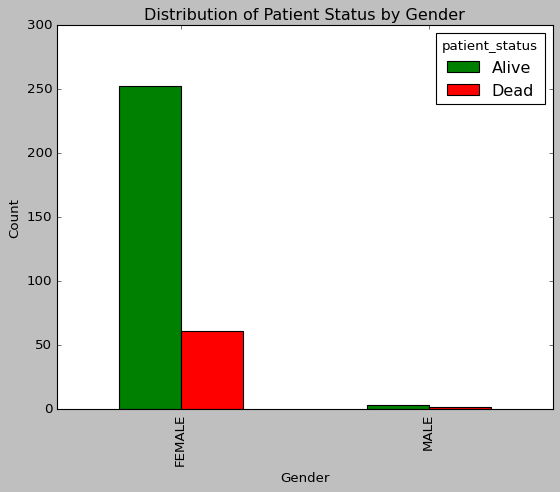

In [13]:
status = df.groupby(["gender"])["patient_status"].value_counts()

status = status.unstack(level=-1)

status.plot(kind="bar", stacked=False, color=["green", "red"])
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Distribution of Patient Status by Gender")

Text(0.5, 1.0, 'Distribution of Patient Status by Tumour Stage')

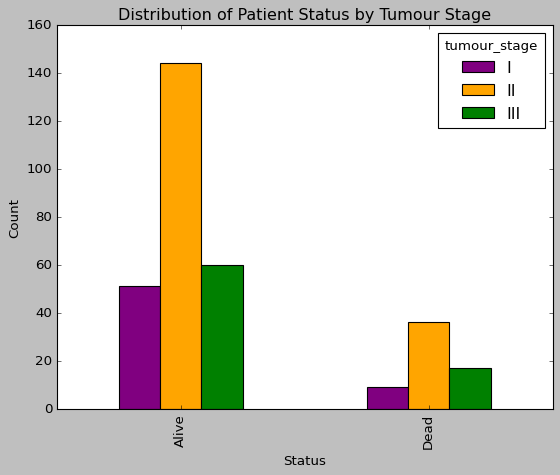

In [14]:
stage = df.groupby(["patient_status"])["tumour_stage"].value_counts()

stage = stage.unstack(level=-1)

stage.plot(kind="bar", stacked=False, color=["purple", "orange", "green"])

plt.ylabel("Count")
plt.xlabel("Status")
plt.title("Distribution of Patient Status by Tumour Stage")

Text(0.5, 1.0, 'Histology of Cancer Patients')

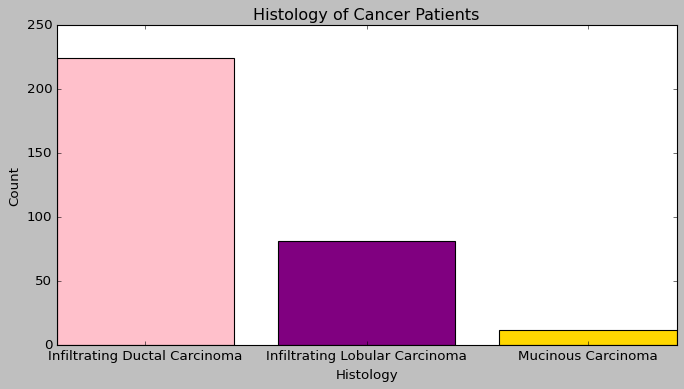

In [15]:
type = df["histology"].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(type.index, type.values, color=["pink", "purple", "gold"])
plt.xlabel("Histology")
plt.ylabel("Count")
plt.title("Histology of Cancer Patients")

### Model Preperation


In [16]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


In [17]:
df.head()


,age,gender,protein1,protein2,protein3,protein4,tumour_stage,histology,er,pr,HER2,surgery_type,surgery,last_visit,patient_status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


In [18]:
df_dummies = pd.get_dummies(
    df,
    columns=["gender", "tumour_stage", "histology", "er", "pr", "HER2", "surgery_type"],
)

df_dummies = df_dummies.drop(columns=["surgery", "last_visit"])

df_dummies

,age,protein1,protein2,protein3,protein4,patient_status,gender_FEMALE,gender_MALE,tumour_stage_I,tumour_stage_II,...,histology_Infiltrating Lobular Carcinoma,histology_Mucinous Carcinoma,er_Positive,pr_Positive,HER2_Negative,HER2_Positive,surgery_type_Lumpectomy,surgery_type_Modified Radical Mastectomy,surgery_type_Other,surgery_type_Simple Mastectomy
0,42,0.952560,2.15000,0.007972,-0.048340,Alive,1,0,0,1,...,0,0,1,1,1,0,0,0,1,0
1,54,0.000000,1.38020,-0.498030,-0.507320,Dead,1,0,0,1,...,0,0,1,1,1,0,0,0,1,0
2,63,-0.523030,1.76400,-0.370190,0.010815,Alive,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
3,78,-0.876180,0.12943,-0.370380,0.132190,Alive,1,0,1,0,...,0,0,1,1,1,0,0,0,1,0
4,42,0.226110,1.74910,-0.543970,-0.390210,Alive,1,0,0,1,...,0,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0.024598,1.40050,0.024751,0.280320,Alive,1,0,0,1,...,0,0,1,1,0,1,1,0,0,0
330,41,0.100120,-0.46547,0.472370,-0.523870,Alive,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
331,54,0.753820,1.64250,-0.332850,0.857860,Dead,1,0,0,1,...,0,0,1,1,1,0,0,0,0,1
332,74,0.972510,1.42680,-0.366570,-0.107820,Alive,1,0,0,1,...,1,0,1,1,1,0,1,0,0,0


In [19]:
df_dummies.dtypes


age                                           int64
protein1                                    float64
protein2                                    float64
protein3                                    float64
protein4                                    float64
patient_status                               object
gender_FEMALE                                 uint8
gender_MALE                                   uint8
tumour_stage_I                                uint8
tumour_stage_II                               uint8
tumour_stage_III                              uint8
histology_Infiltrating Ductal Carcinoma       uint8
histology_Infiltrating Lobular Carcinoma      uint8
histology_Mucinous Carcinoma                  uint8
er_Positive                                   uint8
pr_Positive                                   uint8
HER2_Negative                                 uint8
HER2_Positive                                 uint8
surgery_type_Lumpectomy                       uint8
surgery_type

In [20]:
y = df_dummies["patient_status"]
X = df_dummies.drop("patient_status", axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0
)

In [22]:
cv_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, 50],
    "min_samples_leaf": [0.5, 1],
    "min_samples_split": [0.001, 0.01],
    "max_features": ["sqrt"],
    "max_samples": [0.5, 0.9],
}

In [23]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)


In [24]:
rf = RandomForestClassifier(random_state=0)


In [25]:
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit="f1", n_jobs=-1, verbose=1)

In [26]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [30]:
rf_opt = RandomForestClassifier(
    n_estimators=50,
    max_depth=50,
    min_samples_leaf=1,
    min_samples_split=0.001,
    max_features="sqrt",
    max_samples=0.9,
    random_state=0,
)

In [31]:
rf_val.fit(X_train, y_train)


Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [32]:
y_pred = rf_val.predict(X_test)


In [33]:
pc_test = precision_score(y_test, y_pred, pos_label="Alive")
print("The precision score is {pc:.3f}".format(pc=pc_test))

The precision score is 0.800


In [34]:
rc_test = recall_score(y_test, y_pred, pos_label="Alive")
print("The recall score is {rc:.3f}".format(rc=rc_test))

The recall score is 1.000


In [35]:
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac=ac_test))

The accuracy score is 0.800


In [36]:
f1_test = f1_score(y_test, y_pred, pos_label="Alive")
print("The F1 score is {f1:.3f}".format(f1=f1_test))

The F1 score is 0.889


In [37]:
table = pd.DataFrame()
table = table.append(
    {
        "Model": "Tuned Random Forest",
        "F1": f1_test,
        "Recall": rc_test,
        "Precision": pc_test,
        "Accuracy": ac_test,
    },
    ignore_index=True,
)
table

/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_11184/3363791597.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(


,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.888889,1.0,0.8,0.8
